In [12]:
import pandas as pd
data = pd.read_csv('Earthquakes_database.csv')
temp_data = data

temp_data['Year'] = pd.to_datetime(temp_data['Date'], errors='coerce').dt.year
temp_data['Month'] = pd.to_datetime(temp_data['Date'], errors='coerce').dt.month
temp_data['Day'] = pd.to_datetime(temp_data['Date'], errors='coerce').dt.day

# გავწმინდოთ ცარიელი მონაცემებისგან
threshold = len(temp_data) * 0.5 
columns_to_drop = temp_data.columns[temp_data.isnull().sum() > threshold]
temp_data.drop(columns=columns_to_drop, inplace=True)


temp_data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year,Month,Day
0,1/2/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,2.0
1,1/4/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,4.0
2,1/5/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,5.0
3,1/8/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,8.0
4,1/9/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,8:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.1898,NN00570710,NN,NN,NN,Reviewed,2016.0,12.0,28.0
23408,12/28/2016,9:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.2187,NN00570744,NN,NN,NN,Reviewed,2016.0,12.0,28.0
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.5200,US10007NAF,US,US,US,Reviewed,2016.0,12.0,28.0
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.4300,US10007NL0,US,US,US,Reviewed,2016.0,12.0,29.0


In [13]:
# cut() ფუნქციის გამოყენება Depth კატეგორიზაციისთვის:
depth_bins = [0, 70, 300, temp_data['Depth'].max()]
depth_labels = ["Shallow", "Intermediate", "Deep"]
temp_data['Depth Category'] = pd.cut(temp_data['Depth'], bins=depth_bins, labels=depth_labels)

temp_data


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year,Month,Day,Depth Category
0,1/2/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,2.0,Intermediate
1,1/4/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,4.0,Intermediate
2,1/5/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,5.0,Shallow
3,1/8/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,8.0,Shallow
4,1/9/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,9.0,Shallow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,8:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.1898,NN00570710,NN,NN,NN,Reviewed,2016.0,12.0,28.0,Shallow
23408,12/28/2016,9:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.2187,NN00570744,NN,NN,NN,Reviewed,2016.0,12.0,28.0,Shallow
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.5200,US10007NAF,US,US,US,Reviewed,2016.0,12.0,28.0,Shallow
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.4300,US10007NL0,US,US,US,Reviewed,2016.0,12.0,29.0,Intermediate


In [28]:
# აგრეგაცია თარიღის მიხედვით (mean, მაგალითად)

# მხოლოდ რიცხვითი სვეტების შერჩევა აგრეგაციისთვის
numeric_columns = temp_data.select_dtypes(include=['float64', 'int64'])

# დაჯგუფება "Date" მიხედვით და მნიშვნელობის გამოთვლა მხოლოდ რიცხვითი სვეტებისთვის
aggregated_data = numeric_columns.groupby(temp_data['Date']).mean()
aggregated_data


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Year,Month,Day
Date,,,,,,,,
1/1/1967,-13.2185,-4.0960,30.00,6.20,NaN,1967.0,1.0,1.0
1/1/1969,51.0960,-179.3920,45.00,5.60,NaN,1969.0,1.0,1.0
1/1/1970,-29.4000,-177.1690,35.00,5.60,NaN,1970.0,1.0,1.0
1/1/1971,-4.1900,141.1830,35.00,6.00,NaN,1971.0,1.0,1.0
1/1/1972,-17.0210,174.9030,10.00,6.80,NaN,1972.0,1.0,1.0
...,...,...,...,...,...,...,...,...
9/9/2011,-0.0255,18.5570,16.00,6.15,1.240,2011.0,9.0,9.0
9/9/2012,51.0135,165.3800,73.40,5.70,0.765,2012.0,9.0,9.0
9/9/2013,1.3814,122.2235,22.50,5.60,1.340,2013.0,9.0,9.0


In [34]:
# Melt მაგალითი
melt_example = temp_data.melt(id_vars=['Date', 'Magnitude'], value_vars=['Depth', 'Latitude', 'Longitude'])
melt_example


,Date,Magnitude,variable,value
0,1/2/1965,6.0,Depth,131.6000
1,1/4/1965,5.8,Depth,80.0000
2,1/5/1965,6.2,Depth,20.0000
3,1/8/1965,5.8,Depth,15.0000
4,1/9/1965,5.8,Depth,15.0000
...,...,...,...,...
70231,12/28/2016,5.6,Longitude,-118.8941
70232,12/28/2016,5.5,Longitude,-118.8957
70233,12/28/2016,5.9,Longitude,140.4262
70234,12/29/2016,6.3,Longitude,118.6639


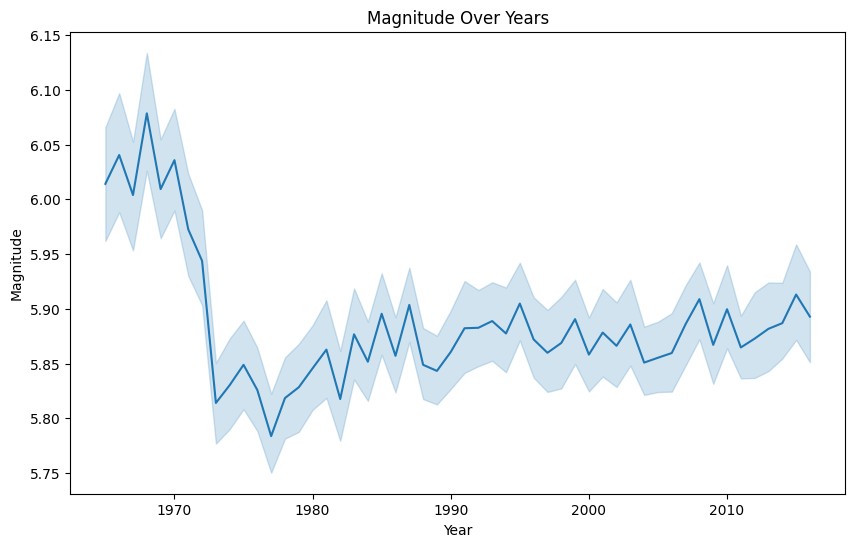

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# ხაზოვანი დიაგრამის მაგალითი
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Magnitude', data=temp_data)
plt.title('Magnitude Over Years')
plt.show()

In [41]:
# წლის კვირისა და კვირის დღის ამოღება
temp_data['Date'] = pd.to_datetime(temp_data['Date'], errors='coerce')
temp_data['WeekOfYear'] = temp_data['Date'].dt.isocalendar().week
temp_data['DayOfWeek'] = temp_data['Date'].dt.day_name()
temp_data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year,Month,Day,Depth Category,WeekOfYear,DayOfWeek
0,1965-01-02,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,2.0,Intermediate,53,Saturday
1,1965-01-04,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,4.0,Intermediate,1,Monday
2,1965-01-05,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,5.0,Shallow,1,Tuesday
3,1965-01-08,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,8.0,Shallow,1,Friday
4,1965-01-09,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0,1.0,9.0,Shallow,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,8:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.1898,NN00570710,NN,NN,NN,Reviewed,2016.0,12.0,28.0,Shallow,52,Wednesday
23408,2016-12-28,9:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.2187,NN00570744,NN,NN,NN,Reviewed,2016.0,12.0,28.0,Shallow,52,Wednesday
23409,2016-12-28,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.5200,US10007NAF,US,US,US,Reviewed,2016.0,12.0,28.0,Shallow,52,Wednesday
23410,2016-12-29,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.4300,US10007NL0,US,US,US,Reviewed,2016.0,12.0,29.0,Intermediate,52,Thursday
